In [45]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Question 1

In [46]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ', regex=True)
df['text'] = df['text'].str.lower()

In [47]:
df

,text,target
0,i am sure some bashers of pens fans are pret...,10
1,my brother is in the market for a high perform...,3
2,finally you said what you dream about me...,17
3,think it s the scsi card doing the dma tran...,3
4,i have an old jasmine drive which i cann...,4
...,...,...
18841,dn from nyeda cnsvax uwec edu david nye dn...,13
18842,not in isolated ground recepticles usually a...,12
18843,i just installed a dx cpu in a clone mothe...,3
18844,wouldn t this require a hyper sphere in s...,1


In [48]:
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['text'])

In [49]:
scaler = StandardScaler(with_mean=False)  # We set with_mean=False because TF-IDF matrices are typically sparse
X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

In [51]:
model = LogisticRegression(max_iter=1000)

In [52]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5657824933687002


Confusion Matrix:


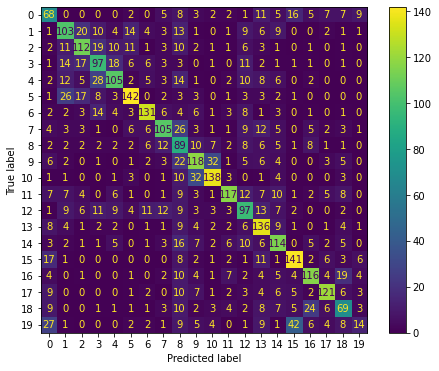

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
confusion_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_mat)
print("Confusion Matrix:")
disp.plot(ax=ax)  
plt.show()

In [55]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.45      0.42       151
           1       0.52      0.51      0.51       202
           2       0.58      0.57      0.58       195
           3       0.50      0.53      0.51       183
           4       0.62      0.51      0.56       205
           5       0.70      0.66      0.68       215
           6       0.73      0.68      0.70       193
           7       0.62      0.54      0.58       196
           8       0.30      0.53      0.39       168
           9       0.55      0.56      0.55       211
          10       0.69      0.70      0.69       198
          11       0.73      0.58      0.65       201
          12       0.48      0.48      0.48       202
          13       0.53      0.70      0.60       194
          14       0.56      0.60      0.58       189
          15       0.64      0.70      0.67       202
          16       0.64      0.62      0.63       188
    

In [56]:
newsgroup_counts = df['target'].value_counts()
newsgroup_counts

10    999
15    997
8     996
9     994
11    991
7     990
13    990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
Name: target, dtype: int64

In [57]:
# Highest precision: Newsgroup 17
# Lowest precision: Newsgroup 8
# There are many factors in play. First, The features extracted from text data can have varying levels of importance 
# for different newsgroups. Group 17 may have distinctive keywords or patterns that the model can easily recognize. And
# group 8 may not have those distinct keywords and patterns. There isn't too large of a difference in the number of observations 
# for both newsgroups. There is some imbalance when it comes to newsgroup 19, which had low precision but not as low as newsgroup 8. 
# Another factor could be the text quality. I did some preprocessing to clean up the text and remove non alphabetic 
# characters, but perhaps there are grammatical mistakes or other errors in the text. 



# Question 2

In [58]:
train = pd.read_csv("./airline_satisfaction/train.csv", index_col=0)
nums = train.select_dtypes(include=['number'])
nums = nums.drop("id", axis=1)
num_cols = list(nums.columns)

# scaler = StandardScaler()
# scaler = scaler.fit(nums)
# X_nums = scaler.transform(nums)

y_train = train["satisfaction"]
train = train.drop("satisfaction", axis=1)

cats = train.select_dtypes(exclude=['number'])
cat_cols = list(cats.columns)


# one_hot_encoder = OneHotEncoder(categories="auto", sparse_output=False)
# X_cats = one_hot_encoder.fit_transform(cats)


# X_nums_train = pd.DataFrame(X_nums, columns=num_cols)
# X_cats_train = pd.DataFrame(X_cats, columns=['Female', 'Male','Loyal Customer','disloyal Customer','Business travel', 'Personal Travel','Business', 'Eco', 'Eco Plus'])

# X_train = pd.concat([X_nums_train, X_cats_train], axis=1)


# imputer = SimpleImputer()
# X_train = imputer.fit_transform(X_train)

In [59]:
test = pd.read_csv("./airline_satisfaction/test.csv", index_col=0)
test = nums.drop("id", axis=1)
# nums = test.select_dtypes(include=['number'])
# nums = nums.drop("id", axis=1)
# num_cols = list(nums.columns)

# scaler = StandardScaler()
# scaler = scaler.fit(nums)
# X_nums = scaler.transform(nums)

y_test = test["satisfaction"]
test = test.drop("satisfaction", axis=1)

# cats = test.select_dtypes(exclude=['number'])
# cat_cols = list(cats.columns)


# one_hot_encoder = OneHotEncoder(categories="auto", sparse_output=False)
# X_cats = one_hot_encoder.fit_transform(cats)


# X_nums_test = pd.DataFrame(X_nums, columns=num_cols)
# X_cats_test = pd.DataFrame(X_cats, columns=['Female', 'Male','Loyal Customer','disloyal Customer','Business travel', 'Personal Travel','Business', 'Eco', 'Eco Plus'])

# X_test = pd.concat([X_nums_test, X_cats_test], axis=1)


# imputer = SimpleImputer()
# X_test = imputer.fit_transform(X_test)

KeyError: "['id'] not found in axis"

In [ ]:
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

In [ ]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)

In [ ]:
### Pipeline ###

In [ ]:
# pipeline = Pipeline(
#     [("scaler", StandardScaler()), ("imputer", SimpleImputer()), ("estimator", LogisticRegression())]
# )
# pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing data by filling with most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), cat_cols)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocess),
    ('classifier', LogisticRegression())
])

In [ ]:
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],  # Regularization parameter
    'classifier__solver': ['liblinear', 'lbfgs'],  # Solver for Logistic Regression
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create GridSearchCV object with ROC AUC as the scoring metric
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5  
)


In [ ]:
grid_search = grid_search.fit(train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
results

In [60]:
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

In [61]:
y_pred = best_estimator.predict(test)
y_pred

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [62]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [3770, 25976]

In [63]:
test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [64]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = best_estimator.predict_proba(test)
curve = RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])
curve.plot()

ValueError: The target y is not binary. Got multiclass type of target.